Limpieza para datos generales de 2025 2'24 y ultimas 52 semanas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


Cargar datasets

In [ ]:

# Ruta de entrada y salida
carpeta_entrada = 'Estadisticas_2024'
carpeta_salida = 'Estadisticas_2024_limpio_2'

# Crear carpeta de salida si no existe
os.makedirs(carpeta_salida, exist_ok=True)

# Lista de columnas que deseas eliminar (puedes modificarla)
columnas_a_eliminar = ['Player_dup', 'M_dup', 'M W-L', 'Aces', 'DFs', 'Pts/SG', 'PtsL/SG', 'Pts/RG','PtsW/RG','MdOppRk','MnOppRk', 'BPConv', 'BPSaved', 'BPvs', 'DR', 'Points', 'TB W-L', 'TBs', 'TB/S', 'Sets', 'Set W-L', 'Gms', 'Game W-L', 'Time/Mt', 'Min/Set', 'Sec/Pt']
# 68-34= 34 columnas
# Procesar cada archivo CSV
# Procesar cada archivo CSV
for archivo in os.listdir(carpeta_entrada):
    if archivo.endswith('.csv'):
        ruta_entrada = os.path.join(carpeta_entrada, archivo)
        ruta_salida = os.path.join(carpeta_salida, archivo)

        # Leer CSV
        df = pd.read_csv(ruta_entrada)

        # Eliminar columnas duplicadas por nombre (quedarse con la primera)
        df = df.loc[:, ~df.columns.duplicated()]

        # Eliminar columnas con sufijos .1, .2, etc. (que vienen de duplicados)
        df = df.loc[:, ~df.columns.str.contains(r'\.\d+$')]

        # Limpieza de columnas y espacios
        df.columns = df.columns.str.strip()
        df = df.apply(lambda col: col.map(lambda x: x.strip() if isinstance(x, str) else x))

        # Reemplazar símbolos
        df = df.replace({'%': '', ',': '.'}, regex=True)

        # Convertir columnas a numérico donde sea posible
        for col in df.columns:
            try:
                df[col] = pd.to_numeric(df[col])
            except Exception:
                pass  # No se puede convertir, se deja como está
        

        # Eliminar columnas no deseadas si existen
        df = df.drop(columns=[col for col in columnas_a_eliminar if col in df.columns])

        # Limpiar la columna 'Player' quitando la nacionalidad entre corchetes
        if 'Player' in df.columns:
            df['Player'] = df['Player'].str.replace(r'\s*\[.*?\]', '', regex=True).str.strip()


        # Guardar el CSV limpio
        df.to_csv(ruta_salida, index=False)
        print(f'Archivo limpio guardado: {ruta_salida}')


Archivo limpio guardado: Estadisticas_2024_limpio_2\estadisticas_generales_2024.csv
Archivo limpio guardado: Estadisticas_2024_limpio_2\stats_best_of_3.csv
Archivo limpio guardado: Estadisticas_2024_limpio_2\stats_Clay.csv
Archivo limpio guardado: Estadisticas_2024_limpio_2\stats_cuartos.csv
Archivo limpio guardado: Estadisticas_2024_limpio_2\stats_final.csv
Archivo limpio guardado: Estadisticas_2024_limpio_2\stats_GrandSlams.csv
Archivo limpio guardado: Estadisticas_2024_limpio_2\stats_Grass.csv
Archivo limpio guardado: Estadisticas_2024_limpio_2\stats_Hard.csv
Archivo limpio guardado: Estadisticas_2024_limpio_2\stats_Masters.csv
Archivo limpio guardado: Estadisticas_2024_limpio_2\stats_r128.csv
Archivo limpio guardado: Estadisticas_2024_limpio_2\stats_r16.csv
Archivo limpio guardado: Estadisticas_2024_limpio_2\stats_r32.csv
Archivo limpio guardado: Estadisticas_2024_limpio_2\stats_r64.csv
Archivo limpio guardado: Estadisticas_2024_limpio_2\stats_semis.csv
Archivo limpio guardado: Est

Elimino las variables que son irrelevantes o tienen otra variable similar pero expresada de manera mas interesante como podria ser el ratio de esa variable.

Ahora con las estadisticas que nos hemos quedado, vamos a ver las correlaciones entre ellas, para ver si podemos eliminar alguna otra

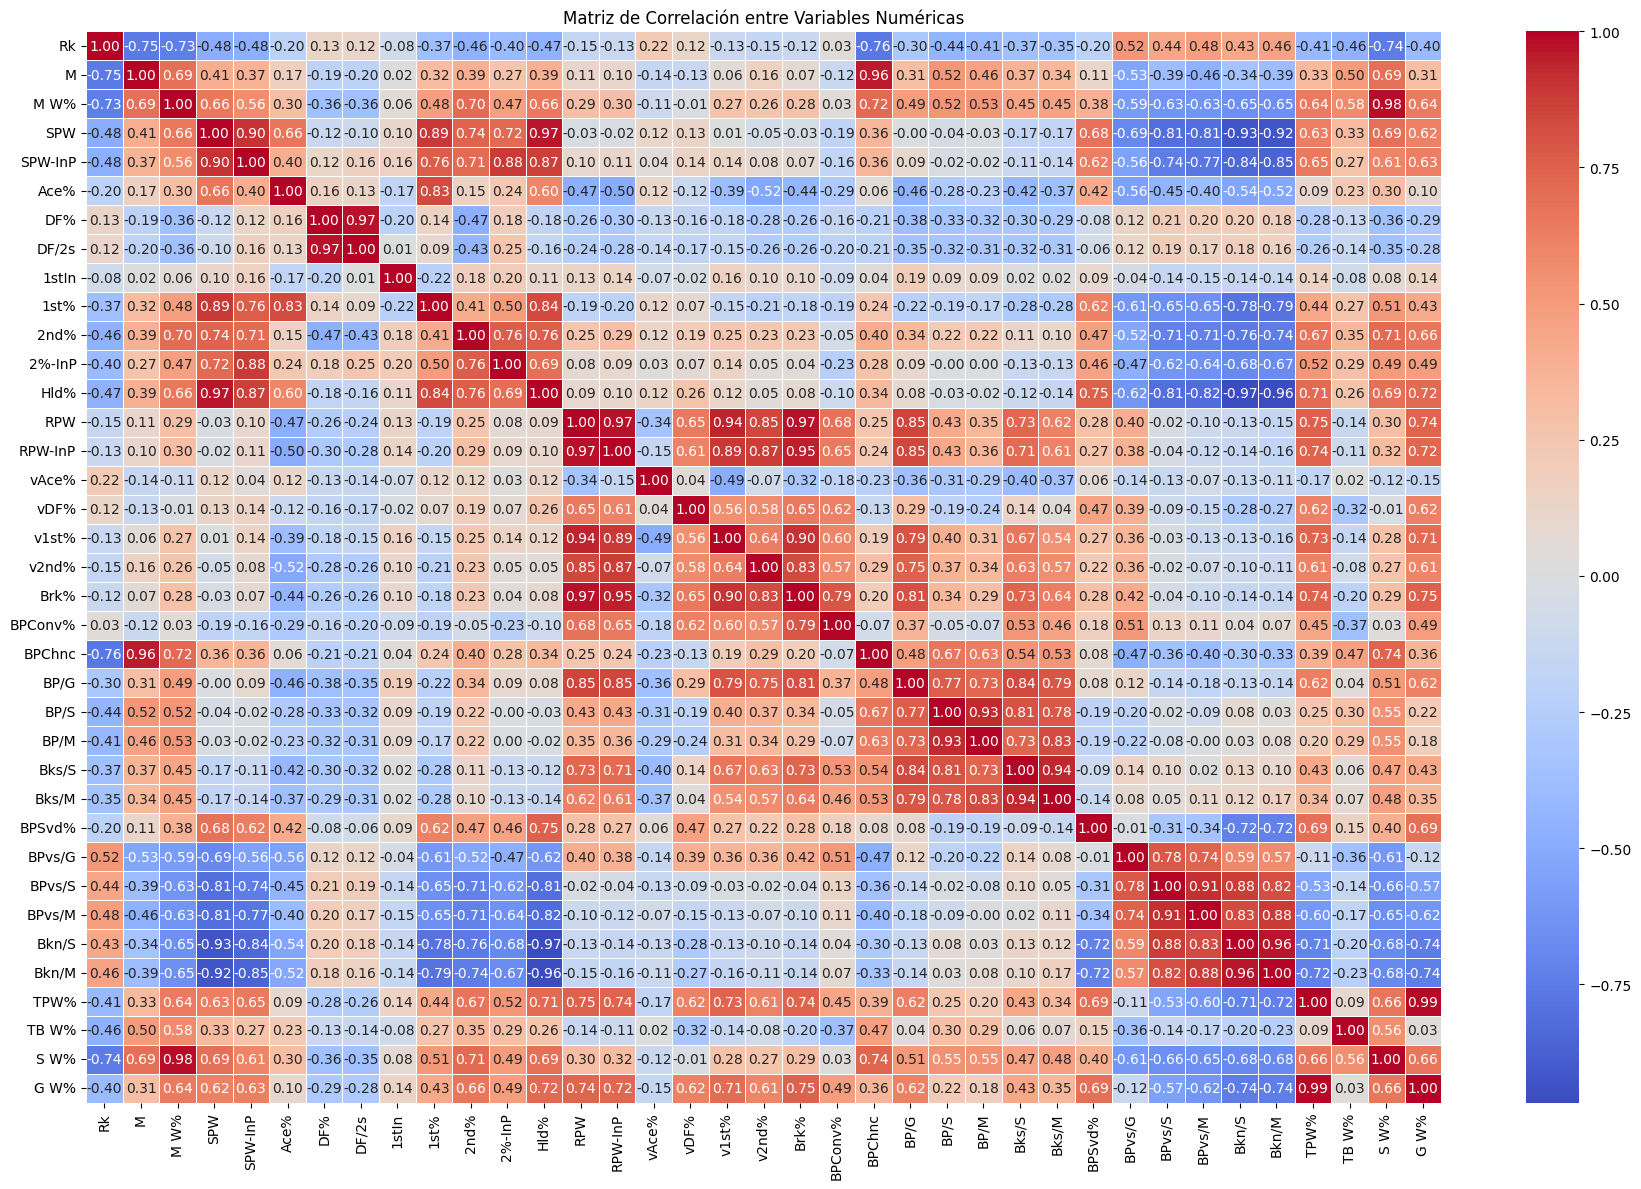

In [6]:
# Cargar el archivo
df = pd.read_csv("Estadisticas_2024_limpio_2/estadisticas_generales_2024.csv")

# Eliminar columnas no numéricas o que contienen valores no convertibles directamente
df_clean = df.copy()

# # Quitar el símbolo '%' y convertir a float donde sea necesario
# df_clean = df_clean.replace('%', '', regex=True)

# # Convertir columnas relevantes a numéricas si es posible
# for col in df_clean.columns:
#     try:
#         df_clean[col] = pd.to_numeric(df_clean[col])
#     except:
#         pass  # Mantener columnas que no pueden convertirse (como nombres de jugadores)

# Seleccionar solo columnas numéricas
df_numeric = df_clean.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
corr_matrix = df_numeric.corr()

# Dibujar el mapa de calor
plt.figure(figsize=(18, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.tight_layout()
plt.show()

M y BPChanc = 0.96, tiene sentido (no quiero utilizar BPChanc) me quedo con M de momento, quizas mas adelante la quite

M W% y S W% = 0.98, tiene sentido pero creo que prefiero dejar las dos, me quedo con M W% ya que SW% no es probabilidad de ganar el saque, es probabilidad de ganar el set, me quedo con la del partido

SPW con SPW_Inc(0.9), con 1st%, Hld%(0.97),  -->SPW y SPW_inc                                                       promediar

DF y DF/2= 0.98 o quito una o promedio-->                                                                    PROMEDIO

2nd% y 2nd-InC = 0.7, tenia pensado juntarlas, deberia? no

RPW y RPW ind= 0.97, tiene sentido, juntar y 0.97 ambas con brk%(que hago con esto),                        las juntos las 2 primeras

BKS/M y BKS/S, quitar unad de las dos

TPW% con G W%= 0.99, quitar una, quizas prefiero G W%, es mas importante, el tenis gana quien gane mas juegos, no mas puntos aunque uno conlleva al otro

columnas_a_eliminar = ['BPChanc', 'S W%','Bks/S, 'TP W%']


TODO ESTO SOLO PARA LOS MODELOS, PARA EL CLUSTER MEJOR SEPARADAS


Una vez que tenemos estas variables, vamos a fijarnos en las que estan correlacionas por encima de un 0.9



Variables con correlación baja con todas (ej., < 0.2 en todo) pueden no aportar valor:

Acción:
👉 Evalúa si deben eliminarse del análisis/modelo.


Busca pares con correlaciones cercanas a ±1. Ejemplos (según lo visible):

RPW y RPW-InP: ≈ 0.97-0.99 → Prácticamente duplicadas → puedes quedarte con una de ellas.

TPW% y G W%: ≈ 0.99-1.00 → Redundantes.

BPM, BPM/S, BPM/M → Correlación altísima entre sí → elige una sola.

Acción:
👉 Reduce la multicolinealidad eliminando una variable de cada grupo redundante.



In [11]:
df = pd.read_csv("Estadisticas_2024_limpio_2/stats_Hard.csv")

# Copiar el DataFrame original
df_transformed = df.copy()

# 1. Eliminar columnas específicas
columnas_a_eliminar = ['BPChanc', 'S W%', 'Bks/S', 'TP W%']
df_transformed = df_transformed.drop(columns=columnas_a_eliminar, errors='ignore')



# 2. Crear variables promediadas y eliminar las originales

# a) DF_avg = promedio de DFs y DF%
if 'DF/2s' in df.columns and 'DF%' in df.columns:
    df_transformed['DF_avg'] = (
        pd.to_numeric(df['DF/2s'], errors='coerce') + pd.to_numeric(df['DF%'], errors='coerce')
    ).div(2).round(1)
    df_transformed = df_transformed.drop(columns=['DF/2s', 'DF%'], errors='ignore')

# b) SPW_avg = promedio de SPW y SPW-InP
if 'SPW' in df.columns and 'SPW-InP' in df.columns:
    df_transformed['SPW_avg'] = (
        pd.to_numeric(df['SPW'], errors='coerce') + pd.to_numeric(df['SPW-InP'], errors='coerce')
    ).div(2).round(1)
    df_transformed = df_transformed.drop(columns=['SPW', 'SPW-InP'], errors='ignore')

# c) RPW_avg = promedio de RPW y RPW-InP
if 'RPW' in df.columns and 'RPW-InP' in df.columns:
    df_transformed['RPW_avg'] = (
        pd.to_numeric(df['RPW'], errors='coerce') + pd.to_numeric(df['RPW-InP'], errors='coerce')
    ).div(2).round(1)
    df_transformed = df_transformed.drop(columns=['RPW', 'RPW-InP'], errors='ignore')

# 3. Guardar el nuevo archivo CSV
df_transformed.to_csv("stats_Hard_2024_transformado.csv", index=False)